In [1]:
import pandas as pd
import datetime
import numpy as np
# users_location = pd.read_csv('tweet_location_parsed.tsv', sep='\t', dtype="str")
users_location = pd.read_csv('../data/poland_sentiment_location.tsv', sep='\t', dtype="str")

users_location

,screen_name,location,location_parsed,user_display,target,sentiment,lang,id,lat,lon,location_display
0,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,0,-1.0,en,1435995464286019584,33.3175322,44.3605874,33.3175322
1,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,1,0.0,en,1436735789799514115,33.3175322,44.3605874,33.3175322
2,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,1,1.0,en,1445036096505749507,33.3175322,44.3605874,33.3175322
3,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,-1,0.0,en,1446417334130790404,33.3175322,44.3605874,33.3175322
4,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,0,0.0,en,1464947433528463365,33.3175322,44.3605874,33.3175322
...,...,...,...,...,...,...,...,...,...,...,...
55972,Burza69,"Warszawa, Polska","{""place_id"": 284979343, ""licence"": ""Data \u00a...",PIOTR BURZA69!💪👊😃👆🔴⚪️🟢,1,-1.0,pl,1470050561890336772,52.2319581,21.0067249,52.2319581
55973,MSDG_IBiRM,"Warszawa, Polska","{""place_id"": 284979343, ""licence"": ""Data \u00a...",Michał,0,0.0,pl,1470049506951634945,52.2319581,21.0067249,52.2319581
55974,KrzysztofPodo11,"Kraków, Polska","{""place_id"": 16808891, ""licence"": ""Data \u00a9...",Krzysztof Podolski,1,-1.0,pl,1470083222868537348,50.0619474,19.9368564,50.0619474
55975,andrajos1975,"Częstochowa, Śląskie","{""place_id"": 286080920, ""licence"": ""Data \u00a...",andrzej cyran,1,-1.0,pl,1470101234732478474,50.8120466,19.113213,50.8120466


In [2]:
users_location.describe()

,screen_name,location,location_parsed,user_display,target,sentiment,lang,id,lat,lon,location_display
count,55977,55977,55977,55977,55977,55977,55977,55977,55977,55977,55977
unique,19880,7248,5666,19551,3,3,52,55977,4618,4618,4618
top,tvp_info,Polska,"{""place_id"": 284973043, ""licence"": ""Data \u00a...",tvp.info 🇵🇱,1,-1.0,pl,1422101396904714241,52.215933,19.134422,52.215933
freq,585,4976,5340,585,46601,22593,26418,1,7369,7369,7369


In [3]:
users_location.head()

,screen_name,location,location_parsed,user_display,target,sentiment,lang,id,lat,lon,location_display
0,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,0,-1.0,en,1435995464286019584,33.3175322,44.3605874,33.3175322
1,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,1,0.0,en,1436735789799514115,33.3175322,44.3605874,33.3175322
2,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,1,1.0,en,1445036096505749507,33.3175322,44.3605874,33.3175322
3,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,-1,0.0,en,1446417334130790404,33.3175322,44.3605874,33.3175322
4,MSF,(Doctors Without Borders),"{""place_id"": 58599185, ""licence"": ""Data \u00a9...",MSF International,0,0.0,en,1464947433528463365,33.3175322,44.3605874,33.3175322


In [4]:
users_location.dtypes

screen_name         object
location            object
location_parsed     object
user_display        object
target              object
sentiment           object
lang                object
id                  object
lat                 object
lon                 object
location_display    object
dtype: object

In [5]:
users_location.dropna(inplace=True)

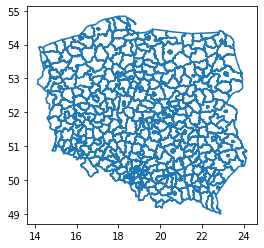

In [6]:
import geopandas
# import geoplot
import shapely
from shapely.geometry import Point

filename = "../data/powiaty.geojson"
file = open(filename)
df = geopandas.read_file(file)

df.boundary.plot()

In [7]:
df

,id,nazwa,geometry
0,1,powiat ropczycko-sędziszowski,"POLYGON ((21.80340 50.15140, 21.80300 50.15010..."
1,2,powiat łosicki,"POLYGON ((22.71870 52.33400, 22.72030 52.33430..."
2,3,powiat piaseczyński,"POLYGON ((21.16500 52.14470, 21.17110 52.13760..."
3,4,powiat radomski,"POLYGON ((21.20550 51.58870, 21.20500 51.58840..."
4,5,powiat sierpecki,"POLYGON ((19.44470 52.93900, 19.44500 52.93940..."
...,...,...,...
375,376,powiat Żory,"MULTIPOLYGON (((18.65680 50.08130, 18.65850 50..."
376,377,powiat nowodworski,"POLYGON ((19.64870 54.45330, 19.63570 54.39220..."
377,378,powiat jaworski,"POLYGON ((16.20390 50.88570, 16.20030 50.88570..."
378,379,powiat poznański,"POLYGON ((16.72980 52.56610, 16.73150 52.56780..."


In [8]:
def get_region_id(x):
    p = Point(float(x["lon"]), float(x["lat"]))
    s = df.contains(p)
    
    match_regions = list(dict(s[s==True]).keys())
    return match_regions[0] if match_regions else None

In [9]:
users_location['region_id'] = users_location.apply(get_region_id, axis=1)

In [10]:
users_location.to_csv('county_sentiment_with_region.tsv', sep='\t', index=False,
             columns=[
             'screen_name',
             'location',
             'location_parsed',
             'user_display',
             'target',
             'sentiment',
             'lang',
             'id',
             'lat',
             'lon',
             'location_display',
             'region_id'])

In [11]:
users_location = users_location[users_location["location_display"]!="Polska"]
users_location.dropna(inplace=True)
users_location

,screen_name,location,location_parsed,user_display,target,sentiment,lang,id,lat,lon,location_display,region_id
6,oko_press,Poland,"{""place_id"": 284973043, ""licence"": ""Data \u00a...",OKO.press,1,0.0,pl,1448929908043010050,52.215933,19.134422,52.215933,173.0
7,oko_press,Poland,"{""place_id"": 284973043, ""licence"": ""Data \u00a...",OKO.press,1,-1.0,pl,1443954058260361218,52.215933,19.134422,52.215933,173.0
8,oko_press,Poland,"{""place_id"": 284973043, ""licence"": ""Data \u00a...",OKO.press,1,-1.0,pl,1444270827227291655,52.215933,19.134422,52.215933,173.0
9,oko_press,Poland,"{""place_id"": 284973043, ""licence"": ""Data \u00a...",OKO.press,1,0.0,pl,1444330628439330819,52.215933,19.134422,52.215933,173.0
10,oko_press,Poland,"{""place_id"": 284973043, ""licence"": ""Data \u00a...",OKO.press,1,-1.0,pl,1444355275255857152,52.215933,19.134422,52.215933,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55972,Burza69,"Warszawa, Polska","{""place_id"": 284979343, ""licence"": ""Data \u00a...",PIOTR BURZA69!💪👊😃👆🔴⚪️🟢,1,-1.0,pl,1470050561890336772,52.2319581,21.0067249,52.2319581,301.0
55973,MSDG_IBiRM,"Warszawa, Polska","{""place_id"": 284979343, ""licence"": ""Data \u00a...",Michał,0,0.0,pl,1470049506951634945,52.2319581,21.0067249,52.2319581,301.0
55974,KrzysztofPodo11,"Kraków, Polska","{""place_id"": 16808891, ""licence"": ""Data \u00a9...",Krzysztof Podolski,1,-1.0,pl,1470083222868537348,50.0619474,19.9368564,50.0619474,13.0
55975,andrajos1975,"Częstochowa, Śląskie","{""place_id"": 286080920, ""licence"": ""Data \u00a...",andrzej cyran,1,-1.0,pl,1470101234732478474,50.8120466,19.113213,50.8120466,362.0


# Sentiment

In [12]:
u3 = users_location.astype({'sentiment': 'float'})

data = dict(u3.groupby(["region_id"])["sentiment"].mean())
data_count = dict(u3.groupby(["region_id"]).count()["id"])


In [13]:
df2 = df.copy()

In [14]:
df2["value"] = 0
df2["count"] = 0
for key, value in data_count.items():
    df2["count"][key] = value
    
for key, value in data.items():
    df2["value"][key] = value

<ipython-input-14-6b8adcff14d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["count"][key] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-14-6b8adcff14d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["value"][key] = value


In [16]:
df2

,id,nazwa,geometry,value,count
0,1,powiat ropczycko-sędziszowski,"POLYGON ((21.80340 50.15140, 21.80300 50.15010...",0.000000,0
1,2,powiat łosicki,"POLYGON ((22.71870 52.33400, 22.72030 52.33430...",0.000000,0
2,3,powiat piaseczyński,"POLYGON ((21.16500 52.14470, 21.17110 52.13760...",-0.470588,17
3,4,powiat radomski,"POLYGON ((21.20550 51.58870, 21.20500 51.58840...",0.000000,12
4,5,powiat sierpecki,"POLYGON ((19.44470 52.93900, 19.44500 52.93940...",-1.000000,1
...,...,...,...,...,...
375,376,powiat Żory,"MULTIPOLYGON (((18.65680 50.08130, 18.65850 50...",-1.000000,2
376,377,powiat nowodworski,"POLYGON ((19.64870 54.45330, 19.63570 54.39220...",-1.000000,1
377,378,powiat jaworski,"POLYGON ((16.20390 50.88570, 16.20030 50.88570...",-0.250000,4
378,379,powiat poznański,"POLYGON ((16.72980 52.56610, 16.73150 52.56780...",-0.285714,7


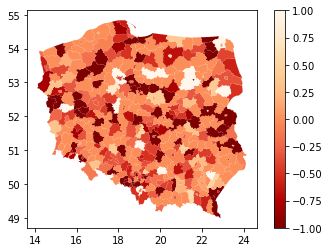

In [17]:
import matplotlib.pyplot as plt  
from  matplotlib.colors import LinearSegmentedColormap

df2.plot(column='value', cmap='OrRd_r', legend=True);
plt.savefig("europe.png")

In [18]:
import seaborn as sns
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda
from pysal.viz.splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

w = weights.Queen.from_dataframe(df2)
w.transform = 'R'

df2 = df2.drop(w.islands)

w = weights.Queen.from_dataframe(df2)
w.transform = 'R'

mi = esda.Moran(df2['value'], w)

/opt/conda/lib/python3.8/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(


In [19]:
mi.I

0.031724702101289894

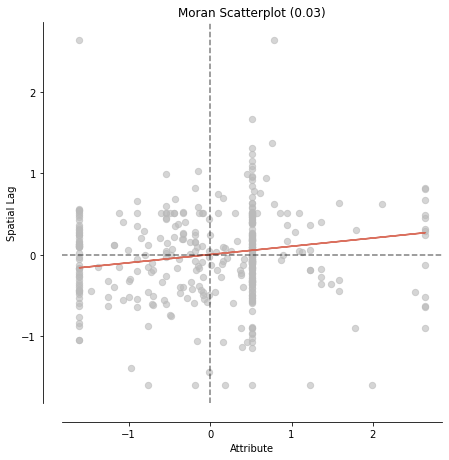

In [20]:
moran_scatterplot(mi);

In [21]:
lisa = esda.Moran_Local(df2['value'], w)

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


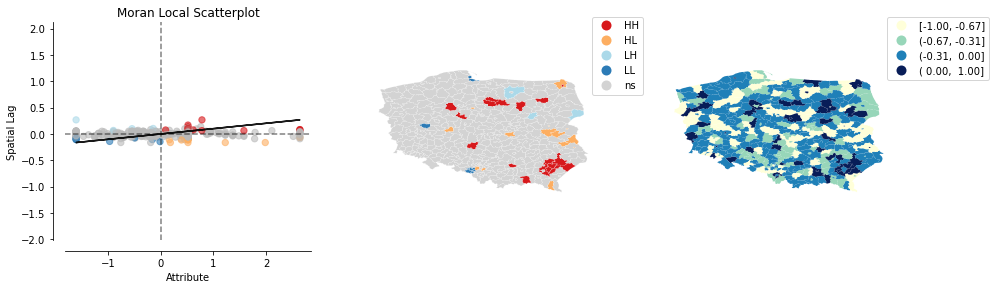

In [22]:
plot_local_autocorrelation(lisa, df2, 'value');

## Clustering

In [23]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=5)
kcls = kmeans.fit(df2[['value']])
df2['class'] = kcls.labels_

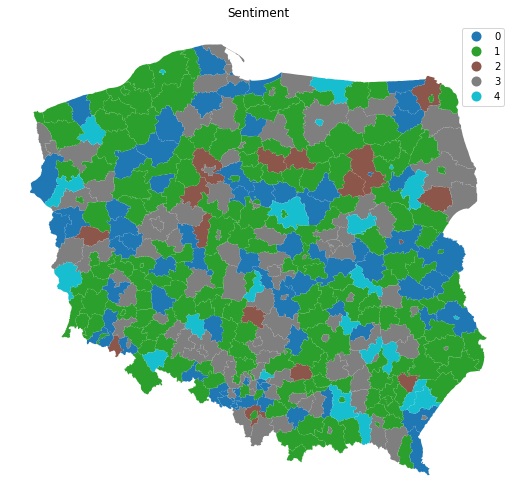

In [24]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
df2.plot(column='class', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
# plt.axis('equal')
# Add title
plt.title('Sentiment')
# Display the map
plt.show()

In [25]:
k5means = df2.groupby('class')[['value']].mean()
# Show the table transposed (so it's not too wide)
k5means.T

class,0,1,2,3,4
value,-0.950217,-0.015683,0.961369,-0.432237,0.359896


In [26]:
def create_plot_df(df, index_col, columns):
    to_plot = df.set_index(index_col)
    # Subset to keep only variables used in K-means clustering
    to_plot = to_plot[columns]
    to_plot = to_plot.stack()
    to_plot = to_plot.reset_index()
    to_plot = to_plot.rename(columns={'level_1': 'Attribute', 0: 'Values'})
    return to_plot

to_plot = create_plot_df(df2, 'class', ['value'])

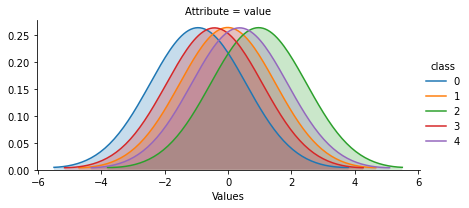

In [27]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Attribute', hue='class', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True, bw=1.5).add_legend()

## Regionalization

In [28]:
from sklearn import cluster

sagg = cluster.AgglomerativeClustering(n_clusters=5, connectivity=w.sparse)
saggcls = sagg.fit(df2[['value']])
df2['saggcls'] = saggcls.labels_

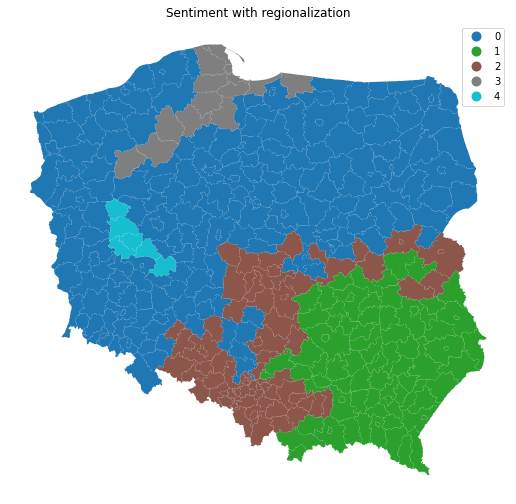

In [29]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
df2.plot(column='saggcls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
# plt.axis('equal')
# Add title
plt.title('Sentiment with regionalization')
# Display the map
plt.show()

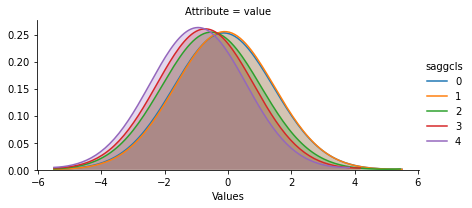

In [30]:
to_plot = create_plot_df(df2, 'saggcls', ['value'])
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Attribute', hue='saggcls', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True, bw=1.5).add_legend()

# Stance

In [31]:
u3 = users_location.astype({'target': 'float'})

data = dict(u3.groupby(["region_id"])["target"].mean())
data_count = dict(u3.groupby(["region_id"]).count()["id"])
df_stance = df.copy()
df_stance["value"] = 0
df_stance["count"] = 0
for key, value in data_count.items():
    df_stance["count"][key] = value
    
for key, value in data.items():
    df_stance["value"][key] = value

<ipython-input-31-6ab5343b5069>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stance["count"][key] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-31-6ab5343b5069>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stance["value"][key] = value


In [32]:
w = weights.Queen.from_dataframe(df_stance)
w.transform = 'R'

df_stance = df_stance.drop(w.islands)

w = weights.Queen.from_dataframe(df_stance)
w.transform = 'R'

mi = esda.Moran(df_stance['value'], w)

In [34]:
df_stance.describe()

,id,value,count
count,380.000000,380.000000,380.000000
mean,190.500000,0.592434,65.500000
std,109.840794,0.416837,528.680178
min,1.000000,-1.000000,0.000000
25%,95.750000,0.000000,1.000000
50%,190.500000,0.757385,3.000000
75%,285.250000,1.000000,14.000000
max,380.000000,1.000000,7388.000000


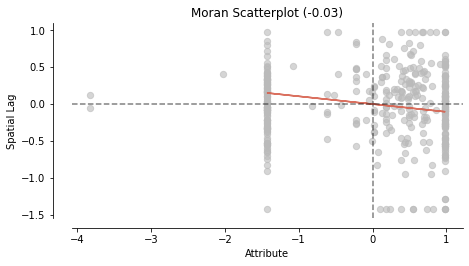

In [33]:
moran_scatterplot(mi);

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


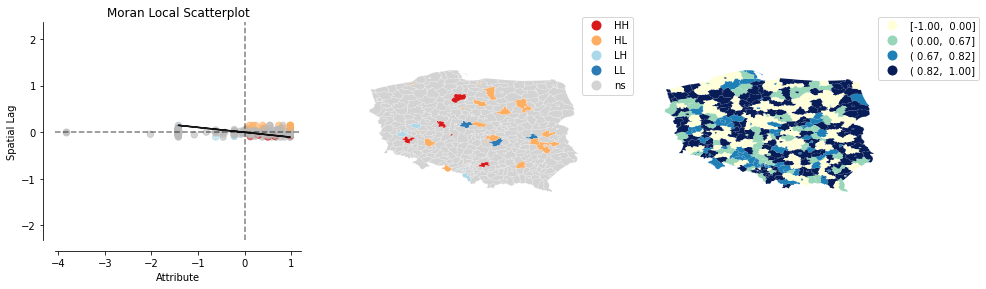

In [35]:
lisa = esda.Moran_Local(df_stance['value'], w)
plot_local_autocorrelation(lisa, df_stance, 'value');